### Audio Load by Barney

In [1]:
from loading_augmenting_functions import add_labels_to_excel,gen_audio_array,buffer,shifter,louder,plot_mel,augment_audio,plot_sample,hsr_loader,lsr_loader,calc_stft,calc_melstft,spec_plot

In [2]:
import librosa
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import re

In [3]:
audio_path = 'zebra audio sample_Bing_413/all/'
spreadsheet_path = 'Zebras.Assumption.data_Bing_413 .xlsx'
df = add_labels_to_excel(spreadsheet_path)

Adding labels


100%|██████████| 413/413 [00:00<00:00, 516934.51it/s]


In [4]:
y = df['label']

In [5]:
audio_files, audio_size, index_longest = gen_audio_array(audio_path,df)

Finding longest file (Better Labels)


100%|██████████| 413/413 [00:07<00:00, 52.10it/s]


Loading files


100%|██████████| 413/413 [00:06<00:00, 59.08it/s]


In [6]:
augmented_audio = augment_audio(audio_files)

Augmenting Non-noise


100%|██████████| 413/413 [00:01<00:00, 391.45it/s]


Making noise


100%|██████████| 413/413 [00:08<00:00, 47.80it/s]


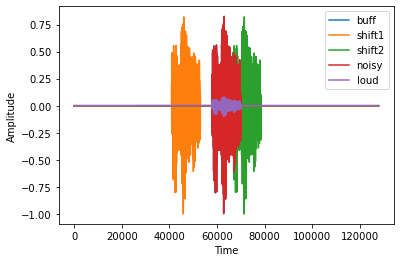

In [7]:
plot_sample(augmented_audio,100)

In [8]:
stfts = calc_stft(augmented_audio)

Augmentation  1


100%|██████████| 413/413 [00:02<00:00, 152.14it/s]


Augmentation  2


100%|██████████| 413/413 [00:02<00:00, 154.73it/s]


Augmentation  3


100%|██████████| 413/413 [00:02<00:00, 152.93it/s]


Augmentation  4


100%|██████████| 413/413 [00:02<00:00, 146.09it/s]


Augmentation  5


100%|██████████| 413/413 [00:02<00:00, 138.66it/s]


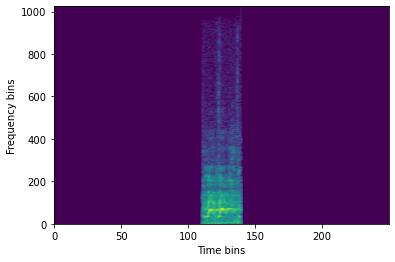

In [9]:
spec_plot(stfts[4,55,:,:])

### Data preparation

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.
/Users/jhn949/opt/anaconda3/envs/appml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jhn949/opt/anaconda3/envs/appml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jhn949/opt/anaconda3/envs/appml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/j

In [18]:
# Split in train and validation subsets
train_images, val_images, train_labels, val_labels = train_test_split(stfts[0], y, test_size=0.2, random_state=13052020)

# explicitly illustrating standardization
def standardizeimg(img, mu, sigma):
    return (img-mu)/(sigma).astype(np.float32)

# save for scaling test data
mu_train = np.mean(train_images)
sigma_train = np.std(train_images)

# Standardize pixel distribution to have zero mean and unit variance
train_images = standardizeimg(img=train_images, mu=mu_train, sigma=sigma_train)
val_images = standardizeimg(img=val_images, mu=np.mean(val_images), sigma=np.std(val_images))



In [22]:
train_images[0].shape

(1025, 250)

In [ ]:
# adapt to format required by tensorflow; Using channels_last --> (n_samples, img_rows, img_cols, n_channels)
img_rows, img_cols = 1025, 250 # input image dimensions
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
val_images = val_images.reshape(val_images.shape[0], img_rows, img_cols, 1)

# convert class vectors to binary class matrices - one hot encoding
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
val_labels = keras.utils.to_categorical(val_labels, num_classes)

# avoid using statistics intrinsic to test data to ensure unbiased estimate of real model performance
test_images = standardizeimg(img=test_images, mu=mu_train, sigma=sigma_train)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
test_labels = keras.utils.to_categorical(test_labels, num_classes)